In [356]:
# Examen Aprendizaje no supervisado - Procesamiento del habla
# Nahila Lützelschwab - padron:100686

In [357]:
import numpy as np # sen, cos
from numpy import fft as ft #fft
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import math as math
import scipy.stats as sps
from scipy.stats import multivariate_normal
import random

In [358]:
def training_data_f(data,initiate,max_amount):
    training = data[initiate:max_amount+1][:];
    return training

In [359]:
def evaluate_data(data_e,initiate_e, max_amount_e):
    evaluate = data_e[initiate_e:max_amount_e+1][:];
    return evaluate

In [360]:
# Funcion de inicializacion al azar
def choose_random(data,amount):
  start = 0;
  end = len(data);
  rows = amount;
  columns = len(np.transpose(data));
  data_random = np.zeros((rows,columns)); # Vector para guardar los datos de inicializacion

  for i in range(start,amount):
    random_chosen = np.random.randint(start,end);
    random_data = data[random_chosen][:];
    data_random[i][:] = random_data;
  return data_random;

In [378]:
# def random_vec(data,random_amount,function_random):
#   amount = len(data);
iter_num = 10;
#   vec = np.zeros(iter_num);
#   for i in range(0,iter_num):
#     vec[i] = function_random(data[i],random_amount);
#   return vec

In [362]:
# Calculo la media a partir del criterio de maxima verosimilitud (maximum likelihood = ml) gaussianas multivariables
def mean_ml(data):
  mean = np.mean(data);
  return mean

In [363]:
# Vector media para cada fonema
def mean_vec(data,mean_function):
  amount = len(np.transpose(data)); # cantidad de fonemas
  vec = np.zeros(amount);
  for i in range(0,amount):
    vec[i] = mean_function(np.transpose(data)[:][i]);
  return vec

In [364]:
# Calculo la covarianza a partir del criterio de maxima verosimilutud (maximum likelihood = ml) gaussianas multivariables
def cov_ml(data):
  cov = np.cov(data);
  return cov

In [365]:
# Funcion que calcula la covarianza interclase
def interclass_cov(vec):
  cov = 0 ;
  amount = len(vec);
  for i in range(0,amount):
    cov += vec[i];
  cov /= amount;
  return cov

In [366]:
# Cargo informacion
F1_index = 0;
F2_index = 1;
F3_index= 2;

# Reservo 35 datos para entrenamiento y 15 para evaluacion
initiate_training = 0;
max_training = 35;
initiate_evaluate = max_training;
max_evaluate = 50;

#--------------------------------------------------------------
# Data 'a'
data_a = np.loadtxt('./a.txt');
len_a = len(data_a);
len_data = len_a;

training_a = training_data_f(data_a,initiate_training,max_training);
evaluate_a = evaluate_data(data_a,initiate_evaluate,max_evaluate);

# Tomo los primeros dos formantes 
F1F2_training_a = training_a[:,F1_index:F2_index+1]; 
F1F2_evaluate_a = evaluate_a[:,F1_index:F2_index+1];
#--------------------------------------------------------------
# Data 'o'
data_o = np.loadtxt('./o.txt');
len_o = len(data_o);

training_o = training_data_f(data_o,initiate_training,max_training);
evaluate_o = evaluate_data(data_o,initiate_evaluate,max_evaluate);

# Tomo los primeros dos formantes 
F1F2_training_o = training_o[:,F1_index:F2_index+1];
F1F2_evaluate_o = evaluate_o[:,F1_index:F2_index+1];
#--------------------------------------------------------------
# Data 'u'
data_u = np.loadtxt('./u.txt');
len_u = len(data_u);

training_u = training_data_f(data_u,initiate_training,max_training);
evaluate_u = evaluate_data(data_u,initiate_evaluate,max_evaluate);

# Tomo los primeros dos formantes 
F1F2_training_u = training_u[:,F1_index:F2_index+1];
F1F2_evaluate_u = evaluate_u[:,F1_index:F2_index+1];
#--------------------------------------------------------------

# Inicializo eligendo tres puntos para cada clase
random_amount = 3;
random_training_a = choose_random(F1F2_training_a,random_amount);
random_training_o = choose_random(F1F2_training_o,random_amount);
random_training_u = choose_random(F1F2_training_u,random_amount);

random_vec = [random_training_a,random_training_o,random_training_u];

# Calculo las medias de cada clase
mean_random_a = mean_vec(random_training_a,mean_ml)
mean_random_o = mean_vec(random_training_o,mean_ml)
mean_random_u = mean_vec(random_training_u,mean_ml);

mean_random_vec = [mean_random_a,mean_random_o,mean_random_u];

# Calculo la covarianza de cada clase
cov_random_a = np.cov(np.transpose(random_training_a));
cov_random_o = np.cov(np.transpose(random_training_o));
cov_random_u = np.cov(np.transpose(random_training_u));

cov_random_vec = [cov_random_a,cov_random_o,cov_random_u];

# Calculo la covarianza interclase de los 9 puntos
sigma = (cov_random_a+cov_random_o+cov_random_u)/3;

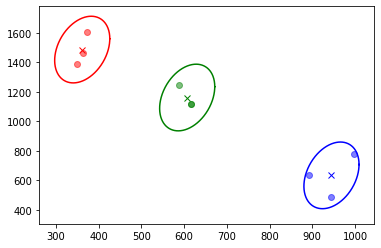

In [367]:
# Curvas de nivel (elipses)

# minimo y maximo vocal a 
min_a = np.min(random_training_a[:,F1_index]);
max_a = np.max(random_training_a[:,F1_index]);

# minimo y maximo vocal o
min_o = np.min(random_training_o[:,F1_index]);
max_o = np.max(random_training_o[:,F1_index]);

# minimo y maximo vocal u
min_u = np.min(random_training_u[:,F1_index]);
max_u = np.max(random_training_u[:,F1_index]);#



y1 = np.cos(np.arange(0, 2*np.pi, 0.01))
y2 = np.sin(np.arange(0, 2*np.pi, 0.01))
Y = np.matrix([y1, y2])

At_a = np.linalg.cholesky(sigma)   # sigma = promedio de covarianzas
At_a = At_a.dot(Y)
At_a = np.transpose(At_a)

At_o = np.linalg.cholesky(sigma)
At_o = At_o.dot(Y)
At_o = np.transpose(At_o)

At_u = np.linalg.cholesky(sigma)
At_u = At_u.dot(Y)
At_u = np.transpose(At_u)

plt.plot(random_training_a[:,F1_index],random_training_a[:,F2_index],'ro', alpha = 0.5)
plt.plot(random_training_o[:,F1_index],random_training_o[:,F2_index],'go', alpha = 0.5)
plt.plot(random_training_u[:,F1_index],random_training_u[:,F2_index],'bo',alpha = 0.5)

plt.plot(min_a,max_a, color = 'r')

plt.plot(mean_random_a[0],mean_random_a[1], marker = 'x', color = 'r')
plt.plot(mean_random_o[0],mean_random_o[1], marker = 'x', color = 'g')
plt.plot(mean_random_u[0],mean_random_u[1], marker = 'x', color = 'b')

plt.plot(2*At_a[:,0] + mean_random_a[0], 2*At_a[:,1] + mean_random_a[1], color = 'r')
plt.plot(min_o,max_o, color = 'g')
plt.plot(2*At_o[:,0] + mean_random_o[0], 2*At_o[:,1] + mean_random_o[1], color = 'g')
plt.plot(min_u,max_u, color = 'b')
plt.plot(2*At_u[:,0] + mean_random_u[0], 2*At_u[:,1] + mean_random_u[1], color = 'b')
plt.show()

In [368]:
# Desordeno los datos del entrenamiento
training_data = np.concatenate((F1F2_training_a, F1F2_training_o), axis=0);
training_data = np.concatenate((training_data, F1F2_training_u), axis=0);
random.shuffle(training_data);

In [369]:
def ellipse(cov):
    At = np.linalg.cholesky(cov)   # sigma = promedio de covarianzas
    At = At.dot(Y)
    At = np.transpose(At)
    return At

In [370]:
def ellipse_plot(mean_k,cov_k):
    At_a = ellipse(cov_k[0]);
    At_o = ellipse(cov_k[1]);
    At_u = ellipse(cov_k[2]);
    plt.plot(2*At_a[:,0] + (mean_k[0][0]), 2*At_a[:,1] + (mean_k[0][1]), color = 'r');
    plt.plot(2*At_o[:,0] + (mean_k[1][0]), 2*At_o[:,1] + (mean_k[1][1]), color = 'g');
    plt.plot(2*At_u[:,0] + (mean_k[2][0]), 2*At_u[:,1] + (mean_k[2][1]), color = 'b');
    return

In [371]:
def loglikelihood_f(data,mean,cov,pi,class_amount):
  log_l = 0;
  length_data = len(data);

  for i in range(0,length_data):
    l = np.empty([class_amount,length_data]);
    for k in range(0,class_amount):
      l[k] = pi[k]*multivariate_normal.pdf(data[i],mean[k],cov[k]);
      log_l += np.log(l[k]);
  return log_l[0]

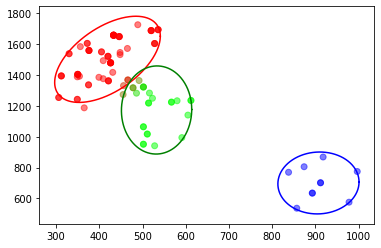

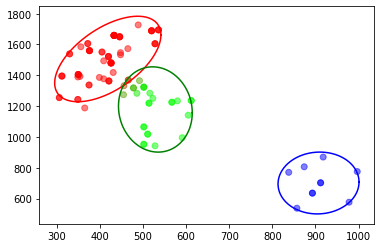

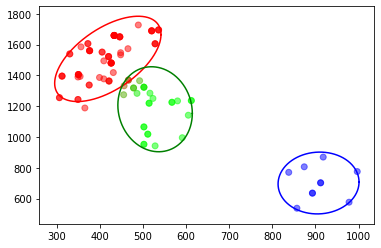

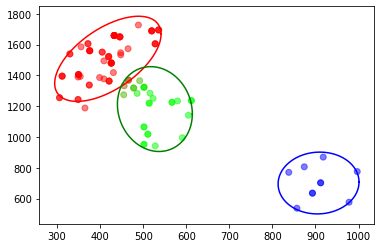

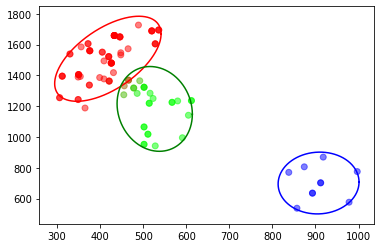

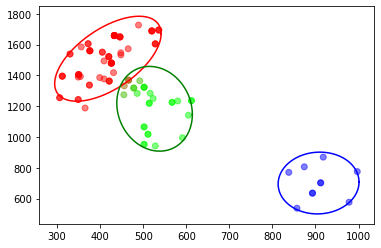

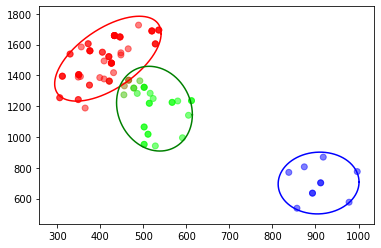

In [379]:
# Calculo EM (expectation maximization)
class_amount = len(random_vec);  # random_vec es un vector cuyas componentes son los vectores con puntos aleatrios de cada clase
                                 # su longitud es la cantidad de clases
Ntrain = len(training_data);
dimensions = 2;
num = np.zeros((Ntrain,class_amount));
gam = np.zeros((Ntrain,class_amount));
pi_k = [(1/3),(1/3),(1/3)];  # Inicializo la probabilidad a posteriori en 1/3

n_k = np.zeros(class_amount);
mean_k_sum = np.zeros((class_amount,dimensions));
mean_k = np.zeros((class_amount,dimensions));

cov_k_sum = np.zeros((class_amount,dimensions,dimensions));
cov_k = np.zeros((class_amount,dimensions,dimensions));

error = 10;
den = 0;
mean_k = mean_random_vec.copy();
cov_k = [sigma,sigma,sigma];
sum_n_k = 0;
log_likelihood = np.empty([iter_num+1,]);
log_likelihood[0] = loglikelihood_f(training_data,mean_k,cov_k,pi_k,class_amount);

for iter in range(0,iter_num):
  #Paso E:
  for i in range(0, Ntrain):
    #Calculo gamma
    den = 0;
    for k in range(0, class_amount):
      num[i,k] = pi_k[k]*multivariate_normal.pdf(training_data[i],mean_k[k],cov_k[k]);
      den += num[i,k];
    for k in range(0,class_amount):
      gam[i,k] = num[i,k]/den;
  
  plt.scatter(training_data[:,F1_index],training_data[:,F2_index], color=[gam[i,:] for i in range(Ntrain)], alpha = 0.5);
  if iter == 0:
    ellipse_plot(mean_k,cov_k);
  plt.show()
  #Paso M:
  for k in range(0, class_amount):
    for i in range(0,Ntrain):
      n_k[k] += gam[i,k];
      mean_k_sum[k] += (gam[i,k]*training_data[i]);
    mean_k[k] = mean_k_sum[k]/n_k[k];
    for n in range(0, Ntrain):
      deviation = (training_data[n]-mean_k[k]);
      cov_k_sum[k] += (gam[n,k]*np.outer(deviation,deviation));
    cov_k[k] = cov_k_sum[k]/n_k[k];

  for i in range(0,class_amount):
    sum_n_k += n_k[i];
  for k in range(0,class_amount):
    pi_k[k] = n_k[k]/sum_n_k;

  #elipses
  if iter != (iter_num-1):
    ellipse_plot(mean_k,cov_k);
  
  log_likelihood[iter+1] = loglikelihood_f(training_data,mean_k,cov_k,pi_k,class_amount);
    
  if (np.abs(log_likelihood[iter-1]-log_likelihood[iter])<2e-6):
   break;
  iter += 1;
  #print(log_likelihood[iter])

In [380]:
# Grafico likelihood por iteraciones
plt.scatter(range(iter+1),log_likelihood[0:iter+1])


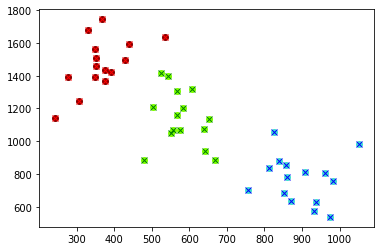

In [374]:
#Funcion que realiza el test recibiendo los puntos de test, y los ultimos vectores pi,mean y cov del algoritmo EM
error = 0;
data_test = np.concatenate((F1F2_evaluate_a, F1F2_evaluate_o), axis=0);
data_test = np.concatenate((data_test, F1F2_evaluate_u), axis=0);
Ntest = len(data_test);
class_vec = np.zeros(Ntest);
pdf = np.zeros((Ntest,class_amount));

plt.plot(F1F2_evaluate_a[:,0], F1F2_evaluate_a[:,1],'o',color = 'darkred',label = 'a');
plt.plot(F1F2_evaluate_o[:,0], F1F2_evaluate_o[:,1],'o', color = 'chartreuse', label = 'o');
plt.plot(F1F2_evaluate_u[:,0], F1F2_evaluate_u[:,1],'o', color = 'turquoise', label = 'u');


for i in range(0,Ntest):
  for k in range(0, class_amount):
    pdf[i,k] = pi_k[k]*multivariate_normal.pdf(data_test[i],mean_k[k],cov_k[k]);   

for j in range(0,Ntest):
  class_vec[j] = np.argmax(pdf[j,:]);
  #if (class_vec[j] != ):
  #  error += 1;
  if (class_vec[j] == 0):
    plt.plot(data_test[j,0], data_test[j,1],'x',color = 'r');
  if (class_vec[j] == 1):
    plt.plot(data_test[j,0], data_test[j,1],'x', color = 'g');
  if (class_vec[j] == 2):
    plt.plot(data_test[j,0], data_test[j,1],'x', color = 'b');
  